# Машинное обучение
# Лабораторная работа №4
## Ширшов Алексей 19-ИВТ-2
### Вариант 21

Задание: "Auto MPG data set"

Цель лабораторной работы – получение навыков работы с методами регрессии.
1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6. Заполните пропущенные значения в данных;
7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

Кодировка классификаторов:
1 – линейная регрессия без использования регуляризаторов;
2 – линейная регрессия, LASSO регуляризатор;
3 – линейная регрессия, RIDGE регуляризатор;

Набор данных: 6
Классификатор: 1, 2

In [36]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
auto_df = pd.read_csv("auto-mpg.data.txt", sep='\s+', 
                      names=['mpg',
                             'cylinders',
                             'displacement',
                             'horsepower',
                             'weight',
                             'acceleration',
                             'model_year',
                             'origin',
                             'car_name'])
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)

Данные относятся к расходу топлива в городском цикле в милях на галлон, который можно прогнозировать с помощью 3 многозначных дискретных и 5 непрерывных атрибутов.

Описание атрибутов файла auto-mpg.data.txt

|Название атрибута|Описание на русском|Тип атрибута|
|---:|---:|---:|
|mpg|Расход топлива (миль на галлон)|Вещественный|
|cylinders|Количество цилиндров|Дискретный|
|displacement|Рабочий объем|Вещественный|
|horsepower|Мощность|Вещественный|
|weight|Вес|Вещественный|
|acceleration|Ускорение|Вещественный|
|model year|Год выпуска|Дискретный|
|origin|Место производства (Америка, Европа, Азия)|Дискретный|
|car name|Название модели|Строка(уникальная для каждого экземпляра)|

### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [38]:
print("Изначальный кол-во строк до удаления дубликатов строк:", auto_df.shape)
auto_without_dupl_df = auto_df.drop_duplicates()
print("Изначальный кол-во строк до удаления дубликатов строк:", auto_without_dupl_df.shape)
auto_without_dupl_df

Изначальный кол-во строк до удаления дубликатов строк: (398, 9)
Изначальный кол-во строк до удаления дубликатов строк: (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [39]:
auto_df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model_year       13
origin            3
car_name        305
dtype: int64

In [40]:
# выделим категориальные и количественные признаки
numerical_columns  = [i for i in auto_df.columns if auto_df[i].dtype.name != 'object']
categorial_columns = [i for i in auto_df.columns if auto_df[i].dtype.name == 'object']

print('Категориальные признаки:', categorial_columns)
print('Количественные признаки:', numerical_columns)

Категориальные признаки: ['horsepower', 'car_name']
Количественные признаки: ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model_year', 'origin']


In [41]:
# horsepower по сути является количественным признаком, а не категориальным
# так что поменяем его тип со строки на вещественный
auto_df['horsepower'] = auto_df['horsepower'].apply(lambda x: float(x) if x!='?' else None)

# origin является категориальным признаком, а не количественным
# меняем тип на строку
auto_df['origin'] = auto_df['origin'].apply(lambda x: str(x))

# Удалим признак car_name
auto_df.drop('car_name', axis=1, inplace=True)

# снова выделим категориальные и количественные признаки
numerical_columns  = [i for i in auto_df.columns if auto_df[i].dtype.name != 'object']
categorial_columns = [i for i in auto_df.columns if auto_df[i].dtype.name == 'object']

print('Категориальные признаки:', categorial_columns)
print('Количественные признаки:', numerical_columns)

Категориальные признаки: ['origin']
Количественные признаки: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


<AxesSubplot:>

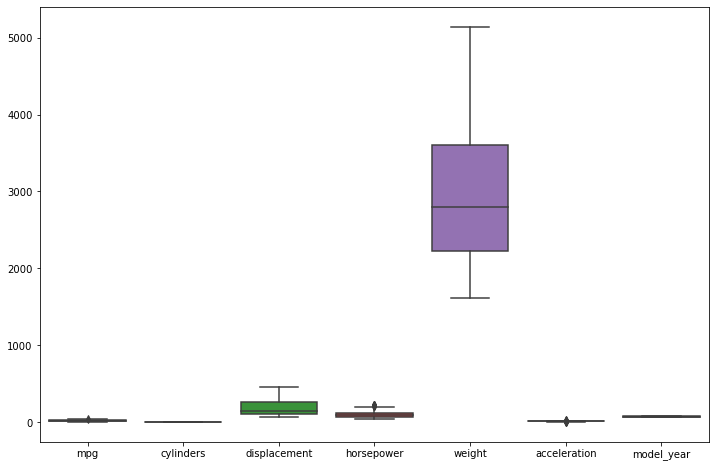

In [42]:
# Диаграмма до масштабирования
plt.figure(figsize=(12,8))
sns.boxplot(data=auto_df[numerical_columns])

<AxesSubplot:>

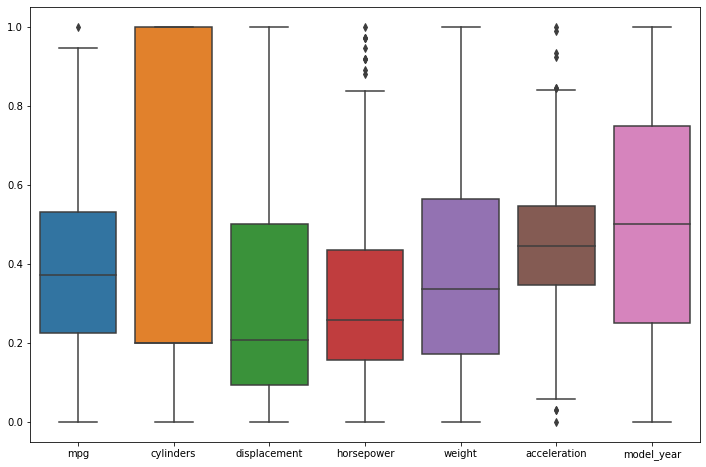

In [43]:
# нормализуем количественные признаки
scaler = preprocessing.MinMaxScaler()
auto_df[numerical_columns] = scaler.fit_transform(auto_df[numerical_columns])

# Диаграмма после масштабирования
plt.figure(figsize=(12,8))
sns.boxplot(data=auto_df[numerical_columns])

### 4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [44]:
# Так как уникальных значений категориальных признаков мало, то
# будем использовать dummy-кодирование
auto_df_dummy = pd.get_dummies(auto_df[categorial_columns])

# Добавим в одну таблицу преобразованные количественные и категориальные признаки
auto_df = pd.concat([auto_df_dummy, auto_df[numerical_columns]] , axis=1)
auto_df

,origin_1,origin_2,origin_3,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,1,0,0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,1,0,0,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,1,0,0,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0
3,1,0,0,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0
4,1,0,0,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0
...,...,...,...,...,...,...,...,...,...,...
393,1,0,0,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0
394,0,1,0,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0
395,1,0,0,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0
396,1,0,0,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0


### 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

<AxesSubplot:>

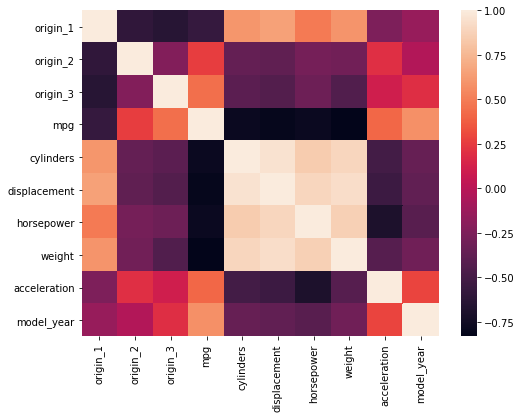

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(auto_df.corr())

#### 6. Заполните пропущенные значения в данных

In [46]:
auto_df.isnull().sum()

origin_1        0
origin_2        0
origin_3        0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

Заполним пропущенные значения средним

In [47]:
auto_df['horsepower'] = auto_df['horsepower'].transform(lambda x: x.fillna(x.mean()))
auto_df.isnull().sum()

origin_1        0
origin_2        0
origin_3        0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

### 7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

In [48]:
# разделим полученные данные на данные для обучения и теста
X, y = auto_df.drop('mpg', axis=1), auto_df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

print(X_train.shape)
print(X_test.shape)

(278, 9)
(120, 9)


#### Линейная регрессия без использования регуляризаторов

In [49]:
reg = LinearRegression(n_jobs=-1)
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)

In [50]:
print('Mean Squared Error = %8.5f' %mean_squared_error(reg_pred, y_test))
print('Root Mean Squared Error = %8.5f' %mean_squared_error(reg_pred, y_test, squared=False))
print('Mean Absolute Error = %8.5f' %mean_absolute_error(reg_pred, y_test))
print()

print('Pearson rank corr: %8.6f' %pearsonr(reg_pred, y_test)[0])
print('p-value:', pearsonr(reg_pred, y_test)[1])
print()
print('Spearman rank corr: %8.6f' %spearmanr(reg_pred, y_test)[0])
print('p-value:', spearmanr(reg_pred, y_test)[1])

Mean Squared Error =  0.00702
Root Mean Squared Error =  0.08380
Mean Absolute Error =  0.06569

Pearson rank corr: 0.912504
p-value: 1.247237154012795e-47

Spearman rank corr: 0.933184
p-value: 2.835902341464952e-54


#### Линейная регрессия, LASSO регуляризатор

In [55]:
lasso = LassoCV(alphas=np.arange(0.001, 10, 0.05), n_jobs=-1)
lasso.fit(X_train, y_train)
print('Best alpha:', lasso.alpha_)
lasso_pred = lasso.predict(X_test)

Best alpha: 0.001


In [56]:
print('Mean Squared Error = %8.5f' %mean_squared_error(lasso_pred, y_test))
print('Root Mean Squared Error = %8.5f' %mean_squared_error(lasso_pred, y_test, squared=False))
print('Mean Absolute Error = %8.5f' %mean_absolute_error(lasso_pred, y_test))
print()

print('Pearson rank corr: %8.6f' %pearsonr(lasso_pred, y_test)[0])
print('p-value:', pearsonr(lasso_pred, y_test)[1])
print()
print('Spearman rank corr: %8.6f' %spearmanr(lasso_pred, y_test)[0])
print('p-value:', spearmanr(lasso_pred, y_test)[1])

Mean Squared Error =  0.00689
Root Mean Squared Error =  0.08300
Mean Absolute Error =  0.06448

Pearson rank corr: 0.915966
p-value: 1.2771998235732707e-48

Spearman rank corr: 0.936214
p-value: 2.0061026413665997e-55


Вывод: учитывая то, что p-value получилось статистически незначимым (оно примерно равно 0), точность достаточно высока, предсказанные и тестовые значения корреллируют (оценка по Спирмену и Пирсону ~ 0,92), значит линейная регрессия хорошо справилась со своей задачей (предсказанием расхода топлива)